# Data Pre-processing

**Imports**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import json

import sys  
sys.path.append('../')

# Utils
import modules.utils.utils as utils

# Data preparation
import modules.data_preparation.sentence_scrapping as sentence_scrapping
import modules.data_preparation.dataset_extension as dataset_extension
import modules.data_preparation.categories as categories


# Data wrangling
import modules.data_wrangling.feature_selection as feature_selection
import modules.data_wrangling.data_wrangling as data_wrangling

import warnings
warnings.filterwarnings('ignore')

# Dataset description

The [dataset](https://github.com/labje/bidaraciv) used is the result of the project “Análisis mediante Big Data de la argumentación jurídica contenida en las resoluciones de la jurisdicción civil en Aragón”. [More information](https://www.youtube.com/watch?v=zrXOLBzetys).

In [3]:
df_original = pd.read_csv("..\..\data\BIDARACIV_Predict-Court-Decision_Data.csv", sep=";")

In [4]:
df_original.head()

,DATE,YEAR,Train,ID,URL,PLAIN_ML,PLAIN_WO,DEFEN_ML,RQ_JOINT,PCI+,...,FT_AG_b,FT_AG,LN_JNPREF_b,LN_JNPREF,FT_SL_IN_b,FT_JN_IN_b,FT_SL_IN,FT_JN_IN,JUDGE_ML,Unnamed: 113
0,43362,2018,1,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,1,0,0,1,0,...,0,0,0,0,3,2,5,4,1,NaN
1,43621,2019,0,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,1,0,0,1,0,...,0,0,0,0,1,1,1,3,1,NaN
2,43607,2019,0,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,1,0,0,1,0,...,0,0,0,0,4,3,8,6,1,NaN
3,43600,2019,0,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,1,0,0,1,0,...,0,0,0,0,2,1,3,2,0,NaN
4,43818,2019,0,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,1,0,0,1,0,...,0,0,0,0,2,0,3,0,1,NaN


In [5]:
df_original.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 114 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          1884 non-null   int64  
 1   YEAR          1884 non-null   int64  
 2   Train         1884 non-null   int64  
 3   ID            1884 non-null   object 
 4   URL           1884 non-null   object 
 5   PLAIN_ML      1884 non-null   int64  
 6   PLAIN_WO      1884 non-null   int64  
 7   DEFEN_ML      1884 non-null   int64  
 8   RQ_JOINT      1884 non-null   int64  
 9   PCI+          1884 non-null   int64  
 10  PCI-          1881 non-null   float64
 11  RQ_FH_AT      1884 non-null   int64  
 12  RQ_FH_SP      1884 non-null   int64  
 13  PVF+          1884 non-null   int64  
 14  PVF-          1884 non-null   int64  
 15  RQ_MP_AT      1884 non-null   int64  
 16  RQ_MP_SP      1884 non-null   int64  
 17  PPA+          1884 non-null   int64  
 18  PPA-          1884 non-null

In [6]:
df = df_original

# Data preparation 

## Categories dataset

In [9]:
df_categories = categories.get_df_categories(file_name=r"..\..\data\feature_category.csv")
df_categories.head()

,feature,category
0,LP_BI_b,Legal principles (general)
1,LP_BI,Legal principles (general)
2,LP_BI_SL_b,Legal principles (general)
3,LP_BI_SL,Legal principles (general)
4,LP_BI_JN_b,Legal principles (general)


In [10]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   feature   74 non-null     object
 1   category  74 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [12]:
list_categories = categories.get_list_categories(file_name=r"..\..\data\feature_category.csv")
list_categories

['Legal principles (general)',
 'Economical aspects',
 'Procesal (economia del procedimiento)',
 'Personal circumstances (parents, children)',
 'Subjectivity (children)',
 'Personal circumstances (children)',
 'Subjectivity (parents)',
 'Legal principles (particular)']

## Dataset extension

### Sentence scrapping

In [13]:
#judge_name_list, headquarters_list = sentence_scrapping.get_sentence_info(df)

### Column extension

In [14]:
added_features_list = ["HQ", "AUT_COMM","JUDGE_ID"]

#### Add judge id column 

In [15]:
#judge_id_list = dataset_extension.create_judge_id_list(judge_name_list, debug = True)

In [16]:
#dataset_extension.insert_column(df, "JUDGE_ML", "JUDGE_ID", judge_id_list)

#### Add headquarters column

In [17]:
#dataset_extension.insert_column(df, "URL", "HQ", headquarters_list)

In [18]:
#df = dataset_extension.standarize_headquarters_names(df)

#### Add autonomous community column

In [19]:
#df = dataset_extension.add_autonomous_community(df)

### Save and open new dataset

In [20]:
#df.to_excel("..\..\output\extended_dataset.xlsx")  

In [21]:
#df.to_csv("..\..\output\extended_dataset.csv", sep=";", index=False)

In [22]:
df = pd.read_csv("..\..\output\extended_dataset.csv", sep=";")
df.head()

,DATE,YEAR,Train,ID,URL,HQ,AUT_COMM,PLAIN_ML,PLAIN_WO,DEFEN_ML,...,FT_AG,LN_JNPREF_b,LN_JNPREF,FT_SL_IN_b,FT_JN_IN_b,FT_SL_IN,FT_JN_IN,JUDGE_ML,JUDGE_ID,Unnamed: 113
0,43362,2018,1,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,3,2,5,4,1,0,NaN
1,43621,2019,0,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,1,1,1,3,1,1,NaN
2,43607,2019,0,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,4,3,8,6,1,1,NaN
3,43600,2019,0,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,2,1,3,2,0,2,NaN
4,43818,2019,0,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,Barcelona,Cataluña,1,0,0,...,0,0,0,2,0,3,0,1,3,NaN


In [23]:
Counter(df["AUT_COMM"]).most_common()

[('Cataluña', 321),
 ('Andalucía', 255),
 ('Castilla y León', 250),
 ('Comunidad de Madrid', 224),
 ('Comunidad Valenciana', 147),
 ('Castilla-La Mancha', 82),
 ('Galicia', 81),
 ('Islas Baleares', 74),
 ('Asturias', 70),
 ('País Vasco', 69),
 ('Aragón', 69),
 ('Región de Murcia', 52),
 ('Navarra', 43),
 ('Extremadura', 42),
 ('Cantabria', 30),
 ('Castilla - La Mancha', 27),
 ('Canarias', 27),
 ('La Rioja', 14),
 ('Galícia', 4),
 ('Melilla', 3)]

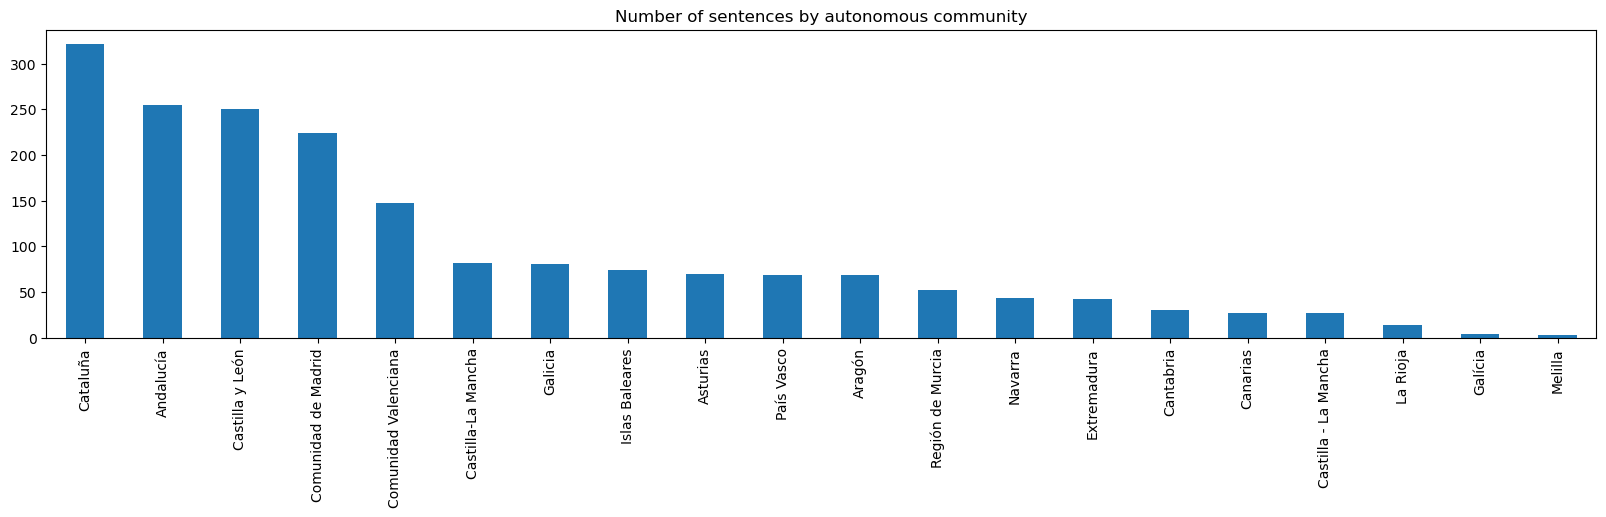

In [24]:
fig = plt.figure(figsize=(20,4))
df["AUT_COMM"].value_counts(sort=True).plot.bar()
plt.title("Number of sentences by autonomous community")
plt.show()

In [25]:
Counter(df["JUDGE_ID"]).most_common()

[(31, 38),
 (152, 31),
 (3, 29),
 (101, 29),
 (30, 25),
 (147, 25),
 (148, 25),
 (151, 25),
 (27, 24),
 (23, 23),
 (153, 23),
 (264, 23),
 (21, 21),
 (159, 21),
 (118, 20),
 (29, 19),
 (19, 18),
 (46, 18),
 (246, 18),
 (244, 17),
 (251, 17),
 (282, 17),
 (26, 16),
 (67, 16),
 (102, 16),
 (284, 16),
 (287, 16),
 (156, 15),
 (306, 15),
 (307, 15),
 (1, 14),
 (119, 14),
 (120, 14),
 (267, 14),
 (285, 14),
 (22, 13),
 (66, 13),
 (243, 13),
 (245, 13),
 (289, 13),
 (186, 12),
 (272, 12),
 (288, 12),
 (10, 11),
 (32, 11),
 (150, 11),
 (230, 11),
 (293, 11),
 (309, 11),
 (115, 10),
 (123, 10),
 (178, 10),
 (179, 10),
 (235, 10),
 (266, 10),
 (0, 9),
 (17, 9),
 (25, 9),
 (42, 9),
 (44, 9),
 (79, 9),
 (161, 9),
 (184, 9),
 (187, 9),
 (273, 9),
 (292, 9),
 (310, 9),
 (9, 8),
 (11, 8),
 (33, 8),
 (48, 8),
 (49, 8),
 (77, 8),
 (85, 8),
 (103, 8),
 (155, 8),
 (181, 8),
 (239, 8),
 (247, 8),
 (249, 8),
 (2, 7),
 (43, 7),
 (73, 7),
 (76, 7),
 (78, 7),
 (82, 7),
 (104, 7),
 (130, 7),
 (194, 7),
 (198,

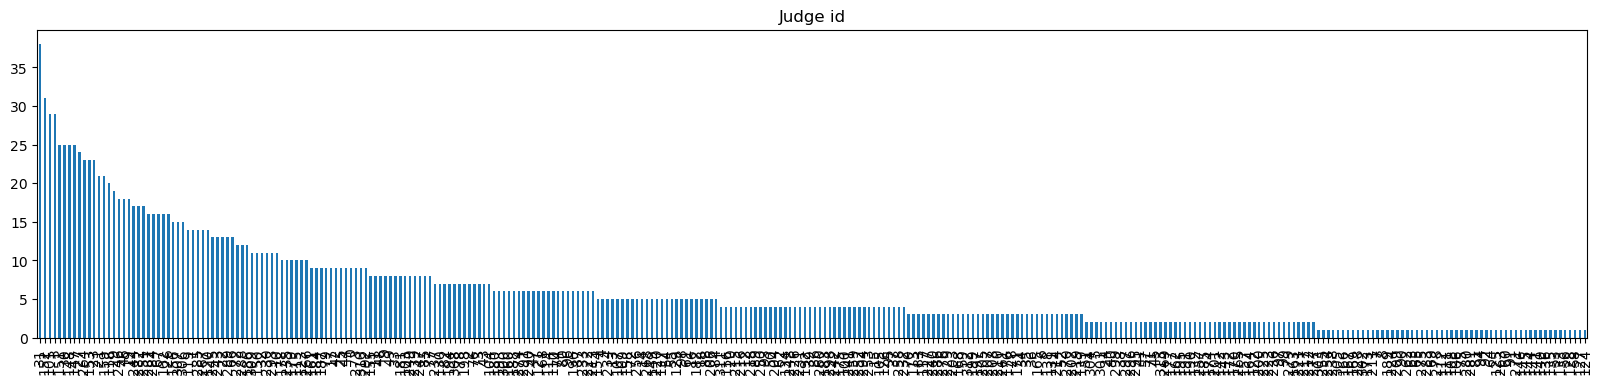

In [26]:
fig = plt.figure(figsize=(20,4))
df["JUDGE_ID"].value_counts(sort=True).plot.bar()
plt.title("Judge id")
plt.show()

# Data wrangling

## Rows selection

Discard sentences with equal plaintiff and defendant gender due to the small size of the corresponding sample (3/1884 records).

In [27]:
print("Number of rows before discarding: " + str(len(df)))

Number of rows before discarding: 1884


In [30]:
same_gender_df = df[df['PLAIN_ML'] == df["DEFEN_ML"]]
same_gender_df

,DATE,YEAR,Train,ID,URL,HQ,AUT_COMM,PLAIN_ML,PLAIN_WO,DEFEN_ML,...,FT_AG,LN_JNPREF_b,LN_JNPREF,FT_SL_IN_b,FT_JN_IN_b,FT_SL_IN,FT_JN_IN,JUDGE_ML,JUDGE_ID,Unnamed: 113
1086,43495,2019,1,APM_2019_980,http://labje.unizar.es/sentencias/APM_2019_980...,Madrid,Comunidad de Madrid,0,1,0,...,0,0,0,0,4,0,13,0,155,NaN
1711,43781,2019,0,APV_2019_4575,http://labje.unizar.es/sentencias/APV_2019_457...,Valencia,Comunidad Valenciana,0,1,0,...,-1,0,0,2,4,3,10,1,284,NaN
1836,43745,2019,0,APZ_2019_2314,http://labje.unizar.es/sentencias/APZ_2019_231...,Zaragoza,Aragón,0,1,0,...,0,0,0,5,1,8,1,1,306,NaN


In [31]:
indices_to_discard = same_gender_df.index
df = df.drop(indices_to_discard).reset_index()
df.head()

,index,DATE,YEAR,Train,ID,URL,HQ,AUT_COMM,PLAIN_ML,PLAIN_WO,...,FT_AG,LN_JNPREF_b,LN_JNPREF,FT_SL_IN_b,FT_JN_IN_b,FT_SL_IN,FT_JN_IN,JUDGE_ML,JUDGE_ID,Unnamed: 113
0,0,43362,2018,1,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,Alicante,Comunidad Valenciana,1,0,...,0,0,0,3,2,5,4,1,0,NaN
1,1,43621,2019,0,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,Alicante,Comunidad Valenciana,1,0,...,0,0,0,1,1,1,3,1,1,NaN
2,2,43607,2019,0,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,Alicante,Comunidad Valenciana,1,0,...,0,0,0,4,3,8,6,1,1,NaN
3,3,43600,2019,0,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,Alicante,Comunidad Valenciana,1,0,...,0,0,0,2,1,3,2,0,2,NaN
4,4,43818,2019,0,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,Barcelona,Cataluña,1,0,...,0,0,0,2,0,3,0,1,3,NaN


In [32]:
print("Number of rows after discarding: " + str(len(df)))

Number of rows after discarding: 1881


## Feature selection

In [33]:
features_classification_lists = feature_selection.features_classification_lists()
features_classification_lists

Group
Court decisions            [CD_JOINT, CD_JO_CF, WIN_SL, WINWIN, CD_FH_AT,...
Defendants's gender                                               [DEFEN_ML]
Facts                      [FT_RP_b, FT_RP, FT_CW_b, FT_CW, FT_CC_b, FT_C...
Facts detail               [FT_RP_SL_b, FT_RP_SL, FT_RP_JN_b, FT_RP_JN, F...
Facts index                     [FT_SL_IN_b, FT_JN_IN_b, FT_SL_IN, FT_JN_IN]
Judge gender                                                      [JUDGE_ML]
Judicial resolution                                    [ID, URL, DATE, YEAR]
Legal norms                                         [LN_JNPREF_b, LN_JNPREF]
Legal principles           [LP_BI_b, LP_BI, LP_PE_b, LP_PE, LP_RA_b, LP_R...
Legal principles detail    [LP_BI_SL_b, LP_BI_SL, LP_BI_JN_b, LP_BI_JN, L...
Plainfiff's gender                                                [PLAIN_ML]
Plainfiff's requests       [RQ_JOINT, RQ_FH_AT, RQ_FH_SP, RQ_MP_AT, RQ_MP...
Name: Short name, dtype: object

In [34]:
features_classification_lists.to_csv("..\..\output\df_features_classification.csv", sep=";")

In [35]:
df = feature_selection.select_dataset_features(df, features_classification_lists, added_features_list)
df.head()

,ID,URL,DATE,YEAR,HQ,AUT_COMM,JUDGE_ID,JUDGE_ML,PLAIN_ML,DEFEN_ML,...,LN_JNPREF_b,LN_JNPREF,CD_JOINT,CD_JO_CF,WIN_SL,WINWIN,CD_FH_AT,CD_FH_SP,CD_MP_AT,CD_MP_SP
0,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,43362,2018,Alicante,Comunidad Valenciana,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,43621,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,43607,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
3,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,43600,2019,Alicante,Comunidad Valenciana,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,43818,2019,Barcelona,Cataluña,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
categorical_features = features_classification_lists["Judicial resolution"] + added_features_list

## Null values

In [37]:
data_wrangling.null_values_detection(df)

There are no null values in the dataset


## Standarization

In [38]:
df = data_wrangling.scale(df, categorical_features)
df.head()

,ID,URL,DATE,YEAR,HQ,AUT_COMM,JUDGE_ID,JUDGE_ML,PLAIN_ML,DEFEN_ML,...,LN_JNPREF_b,LN_JNPREF,CD_JOINT,CD_JO_CF,WIN_SL,WINWIN,CD_FH_AT,CD_FH_SP,CD_MP_AT,CD_MP_SP
0,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,43362,2018,Alicante,Comunidad Valenciana,0,1,1,0,...,0,0.0,0,0,0,0,0,0,1,0
1,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,43621,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0.0,0,0,0,0,0,0,0,0
2,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,43607,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0.0,0,0,0,0,1,0,1,0
3,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,43600,2019,Alicante,Comunidad Valenciana,2,0,1,0,...,0,0.0,0,0,0,0,0,0,1,0
4,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,43818,2019,Barcelona,Cataluña,3,1,1,0,...,0,0.0,0,0,0,0,0,0,0,0


In [39]:
df.to_csv("..\..\output\df_cleaned.csv", sep=";", index=False)